In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras import backend as K
from keras import callbacks
import holoviews as hv
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.7 MB/s eta 0:00:00


In [2]:
# import data

df = pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['sex'] = df['sex'].map({'female': 1, 'male': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [4]:
# subsampling of the data
df = df.sample(frac=1.0, random_state=42)

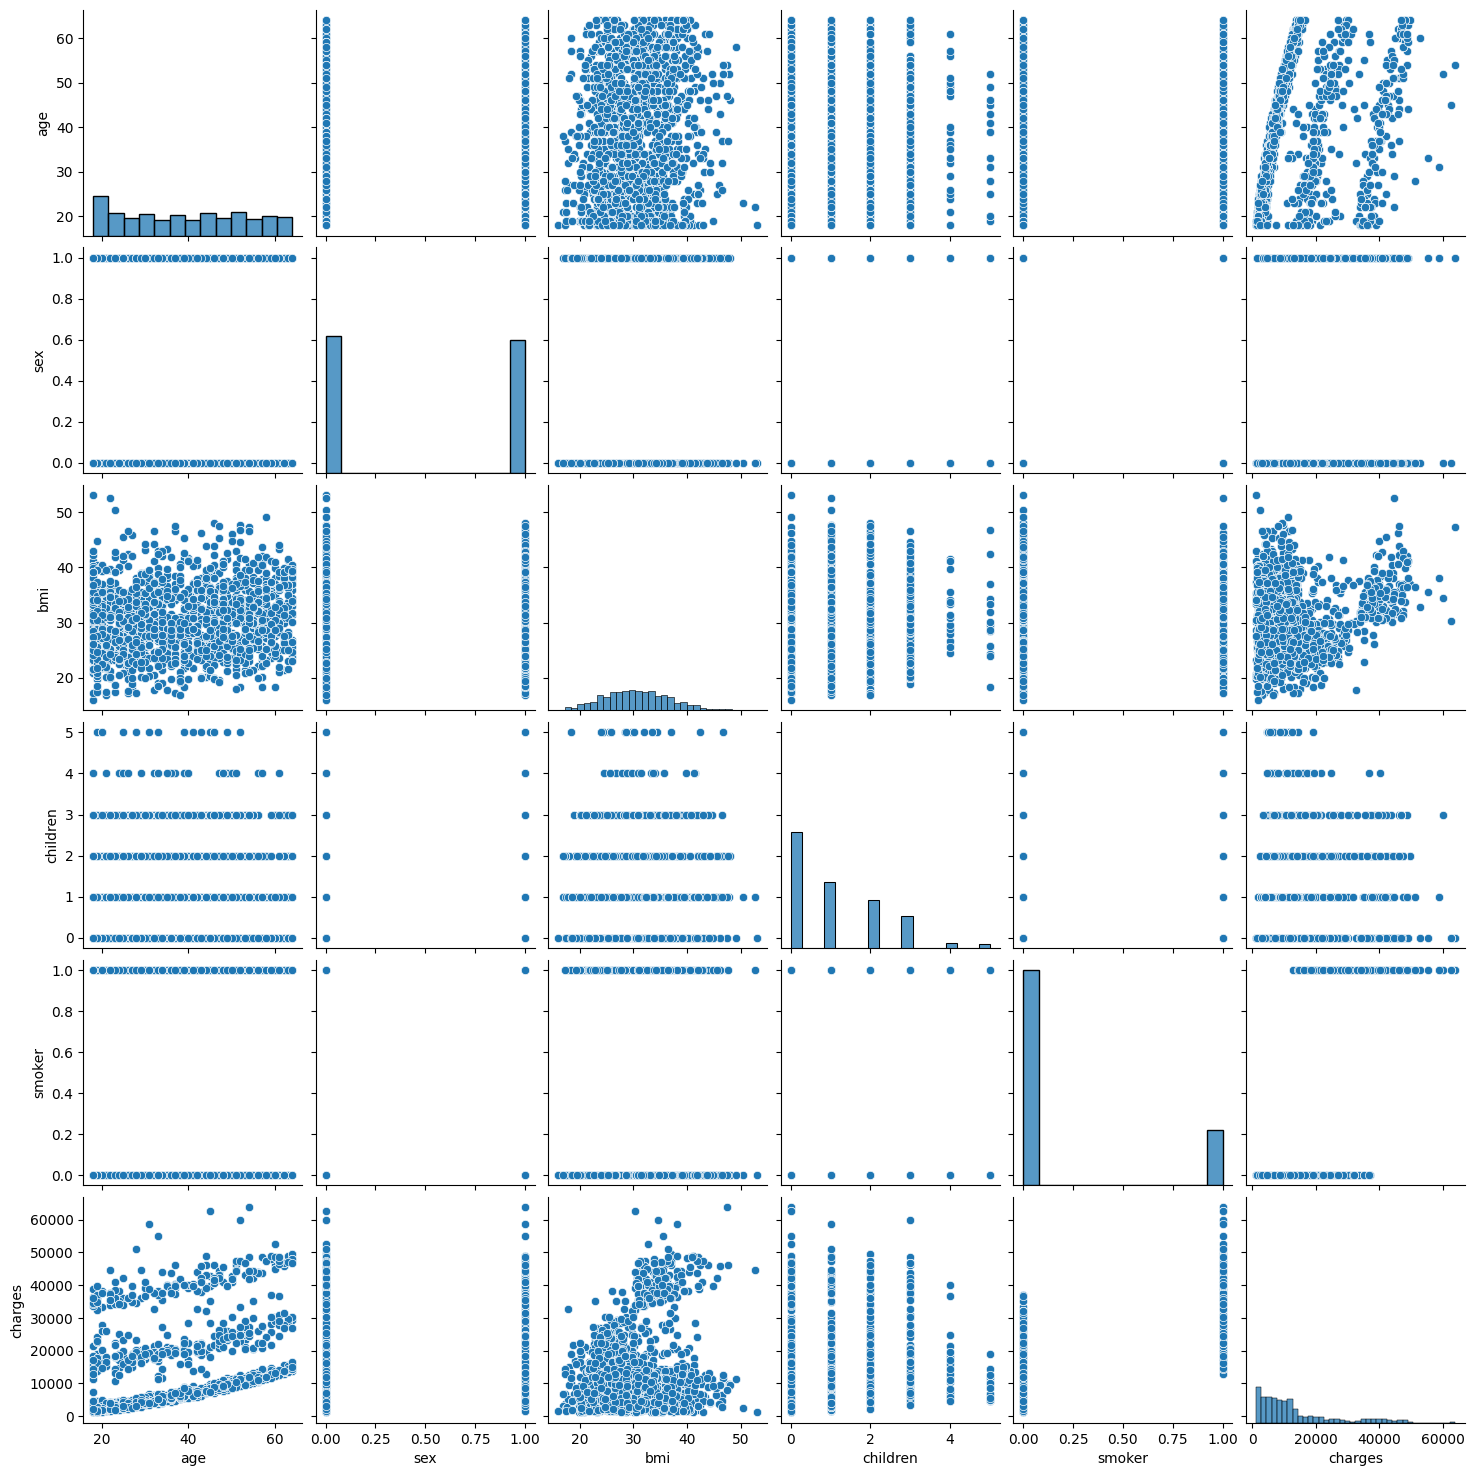

In [5]:
sns.pairplot(df)

In [6]:
# define features and output

X = df[['age', 'sex', 'bmi',
               'children', 'smoker']]
y = df['charges']

In [7]:
# Split train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Scale input data

X_scaler = StandardScaler()

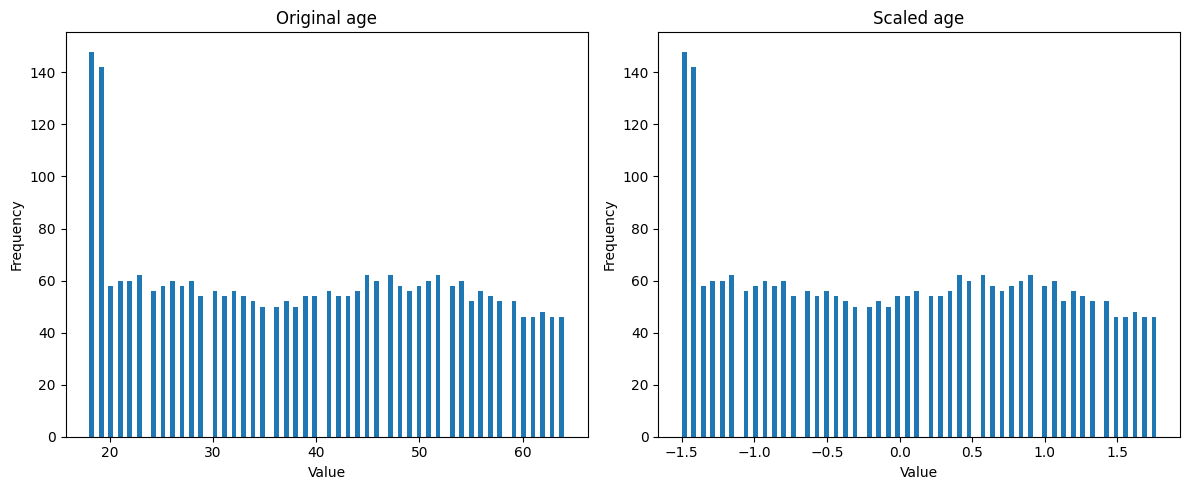

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Get the first feature name
first_feature = X.columns[0]

# Plot original distribution
ax1.hist(X[first_feature], bins=100)
ax1.set_title(f'Original {first_feature}')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Plot scaled distribution
ax2.hist(X_scaler.fit_transform(X)[:,0], bins=100)
ax2.set_title(f'Scaled {first_feature}')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [11]:
# Define root mean square (rmse) loss

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

In [12]:
# set up ANN

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(0.0005), loss=rmse)

In [13]:
# Train the model 

ann = model.fit(X_train, y_train,
                validation_data=(X_test,y_test),
                batch_size=1,
                epochs=50,
               )

model.summary()

Epoch 1/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 9589.9697 - val_loss: 5428.5356
Epoch 2/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5072.7231 - val_loss: 4336.2988
Epoch 3/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4203.3521 - val_loss: 3700.0759
Epoch 4/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3326.6826 - val_loss: 3061.4858
Epoch 5/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2868.0049 - val_loss: 2453.5181
Epoch 6/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2275.9480 - val_loss: 2253.7820
Epoch 7/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2484.0596 - val_loss: 2127.8103
Epoch 8/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2310.4543 - val_loss: 2104.0125
Epoch 9/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1956.6213 - val_loss: 2050.1577
Epoch 10/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1905.2351 - val_loss: 2198.7700
Epoch 11/50
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (1, 5)                      │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 256)                    │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 256)                    │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 96)                     │          24,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 1)                      │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,383 (1.05 MB)

 Trainable params: 92,127 (359.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,256 (719.75 KB)

In [14]:
# predict output of test dataset

y_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [15]:
pd.DataFrame(ann.history).hvplot.line(y=['loss', 'val_loss'], logy=True, xlabel='Epochs',
    ylabel='Loss (log scale)')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [16]:
y_pred = y_pred.flatten()

In [17]:
scatterplot = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values', y='Predicted Values')

# Create the diagonal line (pred = true)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
diagonal_line = hv.Curve([(min_val, min_val), (max_val, max_val)], label='Pred = True').opts(color='red', line_dash='dashed')

# Overlay the scatter plot and diagonal line
final_plot = scatterplot * diagonal_line

final_plot

:Overlay
   .Scatter.I              :Scatter   [True Values]   (Predicted Values)
   .Curve.Pred_equals_True :Curve   [x]   (y)

In [18]:

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error: ${mae:,.2f}')

R² Score: 0.8624
Mean Absolute Error: $1,794.25
